In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime
import random
import matplotlib.colors
import cv2
from IPython.display import set_matplotlib_formats
from sklearn.preprocessing import MultiLabelBinarizer 
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from PIL import Image
from google.colab.patches import cv2_imshow

In [152]:
netflix = pd.read_csv('/content/drive/Othercomputers/drive/drive/netflix_titles.csv')
disney = pd.read_csv('/content/drive/Othercomputers/drive/drive/disney_plus_titles.csv')

In [154]:
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [155]:
disney.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


In [156]:
print(netflix.info())
print(disney.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type     

# 데이터 전처리

### 1. movie와 TVshow duration 분리

In [157]:
disney['season'] = disney.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
disney['duration'] = disney.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

disney["duration"] = disney["duration"].astype("int64")
disney["season"] = disney["season"].astype("int64")


In [158]:
netflix.loc[netflix['duration'] != netflix['duration'], 'duration'] = "0"

netflix['season'] = netflix.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
netflix['duration'] = netflix.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

netflix["duration"] = netflix["duration"].astype("int64")
netflix["season"] = netflix["season"].astype("int64")

### 2.플랫폼 추가 날짜 datetime 형식으로 변경

In [174]:
disney["date_added"] = pd.to_datetime(disney['date_added'])

disney['month_added']=disney['date_added'].dt.month
disney['Month_added']=disney['date_added'].dt.month_name()
disney['year_added'] = disney['date_added'].dt.strftime('%Y')

In [172]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])

netflix['month_added']=netflix['date_added'].dt.month
netflix['Month_added']=netflix['date_added'].dt.month_name()
netflix['year_added'] = netflix['date_added'].dt.strftime('%Y')

### 3. 나라 이름 정리

In [161]:
netflix[['country1', 'country2', 'country3', 'country4']] = netflix['country'].str.split(', ',n=3, expand=True)

disney[['country1', 'country2', 'country3', 'country4']] = disney['country'].str.split(', ',n=3, expand=True)


In [173]:
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,month_added,Month_added,year_added,country1,country2,country3,country4
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",0,9.0,September,2021,United States,None,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,9.0,September,2021,South Africa,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,9.0,September,2021,NaN,NaN,NaN,NaN


In [13]:
disney.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,month_added,Month_added,year_added,country1,country2,country3,country4
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!,0,11.0,November,2021.0,NaN,NaN,NaN,NaN
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...,0,11.0,November,2021.0,NaN,NaN,NaN,NaN
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0,11.0,November,2021.0,United States,None,None,None


### 4. 장르 정리

In [14]:
net_genre_list = netflix.listed_in[netflix.listed_in.notnull()].tolist()

net = []

for i in net_genre_list:
  content = i.split(', ')
  for j in content:
    if j not in net:
      net.append(j)

for i in net:
  netflix[str(i)] = netflix.listed_in.dropna().apply(lambda x: 1 if str(i) in ' '.join(x.split()) else 0)

for i in net:
  netflix[i] = netflix[i].fillna(0)

In [15]:
dis_genre_list = disney.listed_in[netflix.listed_in.notnull()].tolist()

dis = []

for i in dis_genre_list:
  content = i.split(', ')
  for j in content:
    if j not in dis:
      dis.append(j)

for i in dis:
  disney[str(i)] = disney.listed_in.dropna().apply(lambda x: 1 if str(i) in ' '.join(x.split()) else 0)

for i in dis:
  disney[i] = disney[i].fillna(0)

In [16]:
net_genre_dict = dict()
for i in net:
  net_genre_dict[i] = netflix[i].sum(axis = 0)

In [17]:
net_genre_dict['International'] = net_genre_dict.pop('International TV Shows')
net_genre_dict['Crime'] = net_genre_dict.pop('Crime TV Shows')
net_genre_dict['Romantic'] = net_genre_dict.pop('Romantic TV Shows')
net_genre_dict['Comedies'] = net_genre_dict.pop('TV Comedies')
net_genre_dict['Horror'] = net_genre_dict.pop('TV Horror')
net_genre_dict['Thrillers'] = net_genre_dict.pop('TV Thrillers')
net_genre_dict['Dramas'] = net_genre_dict.pop('TV Dramas')
net_genre_dict['International'] = net_genre_dict.pop('International Movies')
net_genre_dict['Romantic'] = net_genre_dict.pop('Romantic Movies')
net_genre_dict['Action & Adventure'] = net_genre_dict.pop('TV Action & Adventure')
del net_genre_dict['Movies']
del net_genre_dict['TV Shows']
del net_genre_dict['Independent Movies']

In [18]:
net_genre_dict

{'Action & Adventure': 168,
 'Anime Features': 71,
 'Anime Series': 176,
 'British TV Shows': 253,
 'Children & Family Movies': 641,
 'Classic & Cult TV': 28,
 'Classic Movies': 116,
 'Comedies': 581,
 'Crime': 470,
 'Cult Movies': 71,
 'Documentaries': 869,
 'Docuseries': 395,
 'Dramas': 763,
 'Faith & Spirituality': 65,
 'Horror': 75,
 'Horror Movies': 357,
 'International': 2752,
 "Kids' TV": 451,
 'Korean TV Shows': 151,
 'LGBTQ Movies': 102,
 'Music & Musicals': 375,
 'Reality TV': 255,
 'Romantic': 616,
 'Sci-Fi & Fantasy': 327,
 'Science & Nature TV': 92,
 'Spanish-Language TV Shows': 174,
 'Sports Movies': 219,
 'Stand-Up Comedy': 399,
 'Stand-Up Comedy & Talk Shows': 56,
 'TV Mysteries': 98,
 'TV Sci-Fi & Fantasy': 84,
 'Teen TV Shows': 69,
 'Thrillers': 57}

In [19]:
dis_genre_dict = dict()
for i in dis:
  dis_genre_dict[i] = disney[i].sum(axis = 0)

dis_genre_dict

{'Action-Adventure': 452,
 'Animals & Nature': 208,
 'Animation': 542,
 'Anime': 4,
 'Anthology': 28,
 'Biographical': 41,
 'Buddy': 40,
 'Comedy': 526,
 'Coming of Age': 205,
 'Concert Film': 7,
 'Crime': 16,
 'Dance': 6,
 'Disaster': 2,
 'Documentary': 174,
 'Docuseries': 122,
 'Drama': 134,
 'Family': 632,
 'Fantasy': 192,
 'Game Show / Competition': 10,
 'Historical': 53,
 'Kids': 141,
 'Lifestyle': 8,
 'Medical': 6,
 'Movies': 3,
 'Music': 88,
 'Musical': 44,
 'Mystery': 12,
 'Parody': 9,
 'Police/Cop': 1,
 'Reality': 26,
 'Romance': 20,
 'Romantic Comedy': 2,
 'Science Fiction': 91,
 'Series': 3,
 'Soap Opera / Melodrama': 2,
 'Sports': 43,
 'Spy/Espionage': 3,
 'Superhero': 19,
 'Survival': 9,
 'Talk Show': 1,
 'Thriller': 5,
 'Travel': 1,
 'Variety': 12,
 'Western': 7}

# EDA

### 1. Contents 비교

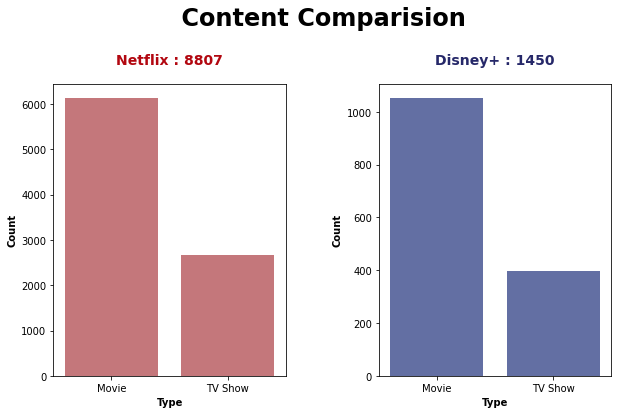

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle(' Content Comparision ',size = 24, weight='bold')
axs = [ax1, ax2]

# 넷플릭스
fig1 = sns.countplot(x="type",data=netflix,ax=ax1,color = '#b20710', alpha=0.6)
fig1.set_ylabel("Count",fontsize=10, weight='bold')
fig1.set_xlabel("Type",fontsize=10,weight='bold')
ax1.set_title(f'Netflix : {netflix.type.value_counts().sum()}', color = '#b20710',size = 14, weight='bold', pad=20)


#디즈니
fig2=sns.countplot(x="type", data=disney,ax=ax2,color = '#2f4399', alpha=0.8)
fig2.set_ylabel("Count",fontsize=10, weight='bold')
fig2.set_xlabel("Type",fontsize=10,weight='bold')
ax2.set_title(f'Disney+ : {disney.type.value_counts().sum()}' ,color = '#262869',size = 14,weight='bold', pad=20)

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=0.4, hspace=None);
plt.show()

In [21]:
ratio=((netflix.groupby(['type'])['type'].count()/len(netflix))).round(2)
net_ratio = pd.DataFrame(ratio).T
net_ratio

type,Movie,TV Show
type,0.7,0.3


In [22]:
ratio=((disney.groupby(['type'])['type'].count()/len(disney))).round(2)
dis_ratio = pd.DataFrame(ratio).T
dis_ratio

type,Movie,TV Show
type,0.73,0.27


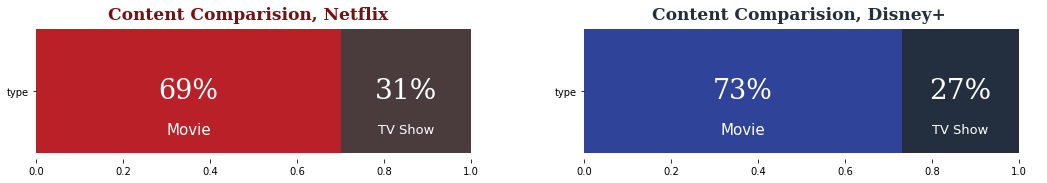

In [29]:
fig, ax = plt.subplots(1,2,figsize=(18, 2.5))

# 넷플릭스
ax[0].barh(net_ratio.index, net_ratio['Movie'], color='#b20710', alpha=0.9)
ax[0].barh(net_ratio.index, net_ratio['TV Show'], left=net_ratio['Movie'], color='#4a3c3d')

for i in net_ratio.index:
    ax[0].annotate("69%", xy=(net_ratio['Movie'][i]/2, i),va = 'center', ha='center',fontsize=27,  fontfamily='serif',color='white')
    ax[0].annotate("Movie", xy=(net_ratio['Movie'][i]/2, -0.25),va = 'center', ha='center',fontsize=15, color='white')
    ax[0].annotate("31%", xy=(net_ratio['Movie'][i]+net_ratio['TV Show'][i]/2, i), va = 'center', ha='center',fontsize=28, fontfamily='serif',color='white')
    ax[0].annotate("TV Show", xy=(net_ratio['Movie'][i]+net_ratio['TV Show'][i]/2, -0.25), va = 'center', ha='center',fontsize=13,color='white')
    fig.text(0.18,0.9,'Content Comparision, Netflix',fontsize=17, fontweight='bold',color='#7a0f11', fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
     ax[0].spines[s].set_visible(False)

# 디즈니
ax[1].barh(dis_ratio.index, dis_ratio['Movie'], color='#2f4399')
ax[1].barh(dis_ratio.index, dis_ratio['TV Show'], left=dis_ratio['Movie'], color='#232F3E')

for i in dis_ratio.index:
    ax[1].annotate("73%", xy=(dis_ratio['Movie'][i]/2, i),va = 'center', ha='center',fontsize=27,  fontfamily='serif',color='white')
    ax[1].annotate("Movie", xy=(dis_ratio['Movie'][i]/2, -0.25),va = 'center', ha='center',fontsize=15, color='white')
    ax[1].annotate("27%", xy=(dis_ratio['Movie'][i]+dis_ratio['TV Show'][i]/2, i), va = 'center', ha='center',fontsize=28, fontfamily='serif',color='white')
    ax[1].annotate("TV Show", xy=(dis_ratio['Movie'][i]+dis_ratio['TV Show'][i]/2, -0.25), va = 'center', ha='center',fontsize=13,color='white')
    fig.text(0.6,0.9,'Content Comparision, Disney+',fontsize=17, fontweight='bold', color='#232F3E', fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
    ax[1].spines[s].set_visible(False)
    
plt.show()

Contents 부분에서는 movie와 TVshow 부문 다 넷플릭스가 많다.  
 disney+는 2016년에 출시되어 오래 된 넷플릭스보다 contents 수가 적을 수 밖에 없을것이다.

### 2. 연도별 contents 증가 추이

In [176]:
d=disney.groupby(['year_added'])['type'].value_counts()
n=netflix.groupby(['year_added'])['type'].value_counts()


In [177]:
dis_a = d.unstack()
net_a = n.unstack()

In [178]:
dis_a

type,Movie,TV Show
year_added,,
2019,630,135
2020,230,122
2021,192,138


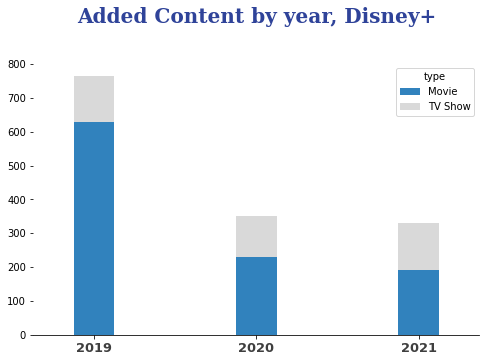

In [182]:
dis_a.plot.bar(stacked=True,figsize=(8,5), cmap='tab20c',width=0.25)
plt.title('Added Content by year, Disney+', fontsize=20,color = '#2f4399', fontweight='bold', fontfamily='serif', pad=40)
plt.xticks(rotation =  0, fontsize=13, fontweight='bold',alpha=0.75)
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.xlabel('')
plt.show()

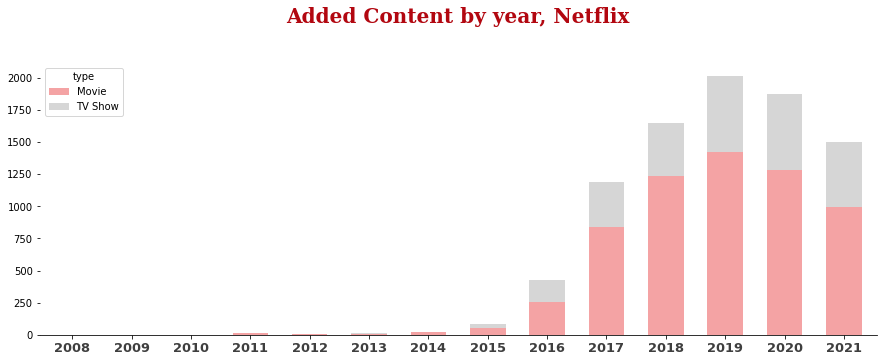

In [181]:
net_a.plot.bar(stacked=True,figsize=(15,5), cmap='Set1',alpha=0.4,width=0.6)
plt.title('Added Content by year, Netflix', fontsize=20,color = '#b20710', fontweight='bold', fontfamily='serif', pad=40)
plt.xticks(rotation =  0, fontsize=13, fontweight='bold',alpha=0.75)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xlabel('')
plt.show()

### 3. 월별 contents 증가 추이

In [31]:
netflix_m = netflix.groupby(['Month_added'])['show_id'].count().fillna(0)
netflix_m = pd.DataFrame(netflix_m, columns=['show_id'])
netflix_m = netflix_m.rename(columns={'show_id':'netflix'})

disney_m = disney.groupby(['Month_added'])['show_id'].count().fillna(0)
disney_m = pd.DataFrame(disney_m, columns=['show_id'])
disney_m = disney_m.rename(columns={'show_id':'disney+'})

month = pd.concat([netflix_m, disney_m], axis = 1).reset_index()
month

,Month_added,netflix,disney+
0,April,764,86
1,August,755,50
2,December,813,52
3,February,563,44
4,January,738,61
5,July,827,85
6,June,728,52
7,March,742,24
8,May,632,62
9,November,705,809


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Added Content by month')

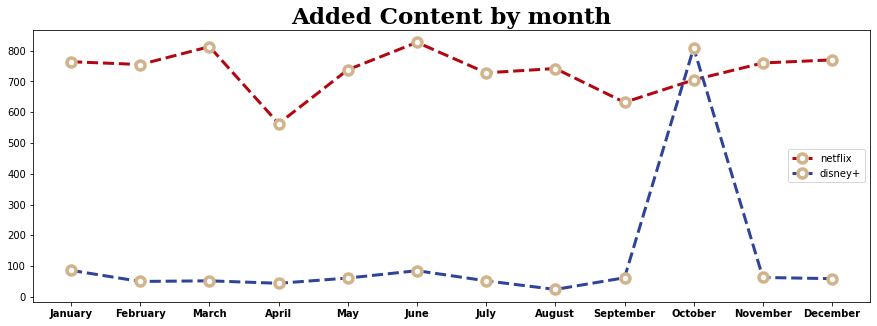

In [32]:
colors = ["#b20710", "#2f4399"]

month.plot(figsize=(15,5), marker='o',color=colors,linewidth=3, linestyle='--',ms=9,mec='tan',mew=3.5,mfc='w')
ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July',
                    'August', 'September', 'October', 'November', 'December'], rotation=0, fontweight='bold')


plt.title("Added Content by month", fontsize=23, fontweight='bold', fontfamily='serif')

### 4. 장르별 분포

In [33]:
net_genre = pd.DataFrame()
net_genre['Content'] = list(net_genre_dict.keys())
net_genre['Values'] = list(net_genre_dict.values())

net_genre = net_genre.sort_values(by = 'Values',ascending = False)[:10]
net_genre

,Content,Values
29,International,2752
0,Documentaries,869
5,Dramas,763
4,Children & Family Movies,641
31,Romantic,616
7,Comedies,581
30,Crime,470
13,Kids' TV,451
26,Stand-Up Comedy,399
2,Docuseries,395


In [34]:
dis_genre = pd.DataFrame()
dis_genre['Content'] = list(dis_genre_dict.keys())
dis_genre['Values'] = list(dis_genre_dict.values())

dis_genre = dis_genre.sort_values(by = 'Values',ascending = False)[:10]
dis_genre

,Content,Values
1,Family,632
0,Animation,542
2,Comedy,526
9,Action-Adventure,452
13,Animals & Nature,208
15,Coming of Age,205
17,Fantasy,192
8,Documentary,174
14,Kids,141
16,Drama,134


In [49]:
plt = px.pie(labels = net_genre['Content'], values = net_genre['Values'], names = net_genre['Content'], width = 550, height = 550)
plt.update_traces(textposition = 'inside', textinfo = 'percent + label', marker = dict(colors = ['#c22b37', '#9e5563', '#9e445f', '#701118','#c7bfc7','#c7bfc7','#c7bfc7','#c7bfc7','#c7bfc7','#c7bfc7'], line = dict(color = 'white', width = 2)))
plt.update_layout(annotations = [dict(text = 'Popular Genres, Netflix', x = 0.5, y = 1.11, font_size = 25, showarrow = False, 
                                      font_family = 'serif', font_color = '#731d23')],showlegend = False)
plt.show()

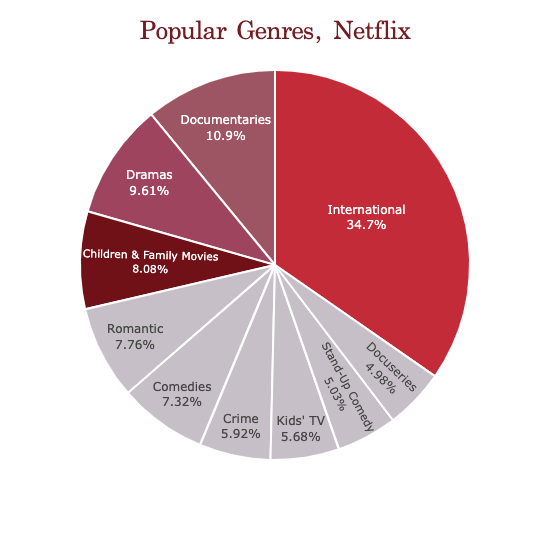

In [54]:
img_path = '/content/drive/Othercomputers/drive/drive/newplot.png'
img = cv2.imread(img_path)
cv2_imshow(img)

In [123]:
plt = px.pie(labels = dis_genre['Content'], values = dis_genre['Values'], names = dis_genre['Content'], width = 550, height = 550)
plt.update_traces(textposition = 'inside', textinfo = 'percent + label', marker = dict(colors = ['#1c33c9', '#5d5f99', '#308cb0', '#052c75','#c7bfc7','#c7bfc7','#c7bfc7','#c7bfc7','#c7bfc7','#c7bfc7'], line = dict(color = 'white', width = 2)))
plt.update_layout(annotations = [dict(text = 'Popular Genres, Disney+', x = 0.5, y = 1.11, font_size = 25, showarrow = False, 
                                      font_family = 'serif', font_color = '#031436')],showlegend = False)

plt.show()

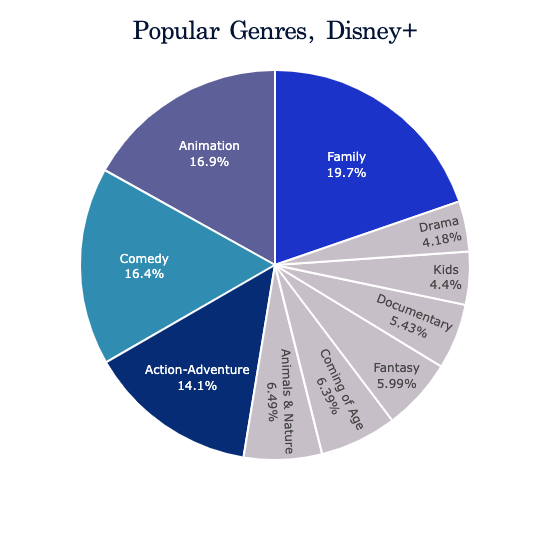

In [52]:
img_path = '/content/drive/Othercomputers/drive/drive/displot.png'
img = cv2.imread(img_path)
cv2_imshow(img)

### 5. 나라별 이용 트렌드

In [28]:
netflix_c = netflix.groupby('country')['show_id'].count().sort_values(ascending=False).reset_index().head(10)

disney_c = disney.groupby('country1')['show_id'].count().sort_values(ascending=False).reset_index().head(10)

In [44]:
netflix_c

,country,show_id
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


In [29]:
disney_c.head()

,country1,show_id
0,United States,1121
1,United Kingdom,50
2,Canada,26
3,France,10
4,Australia,4


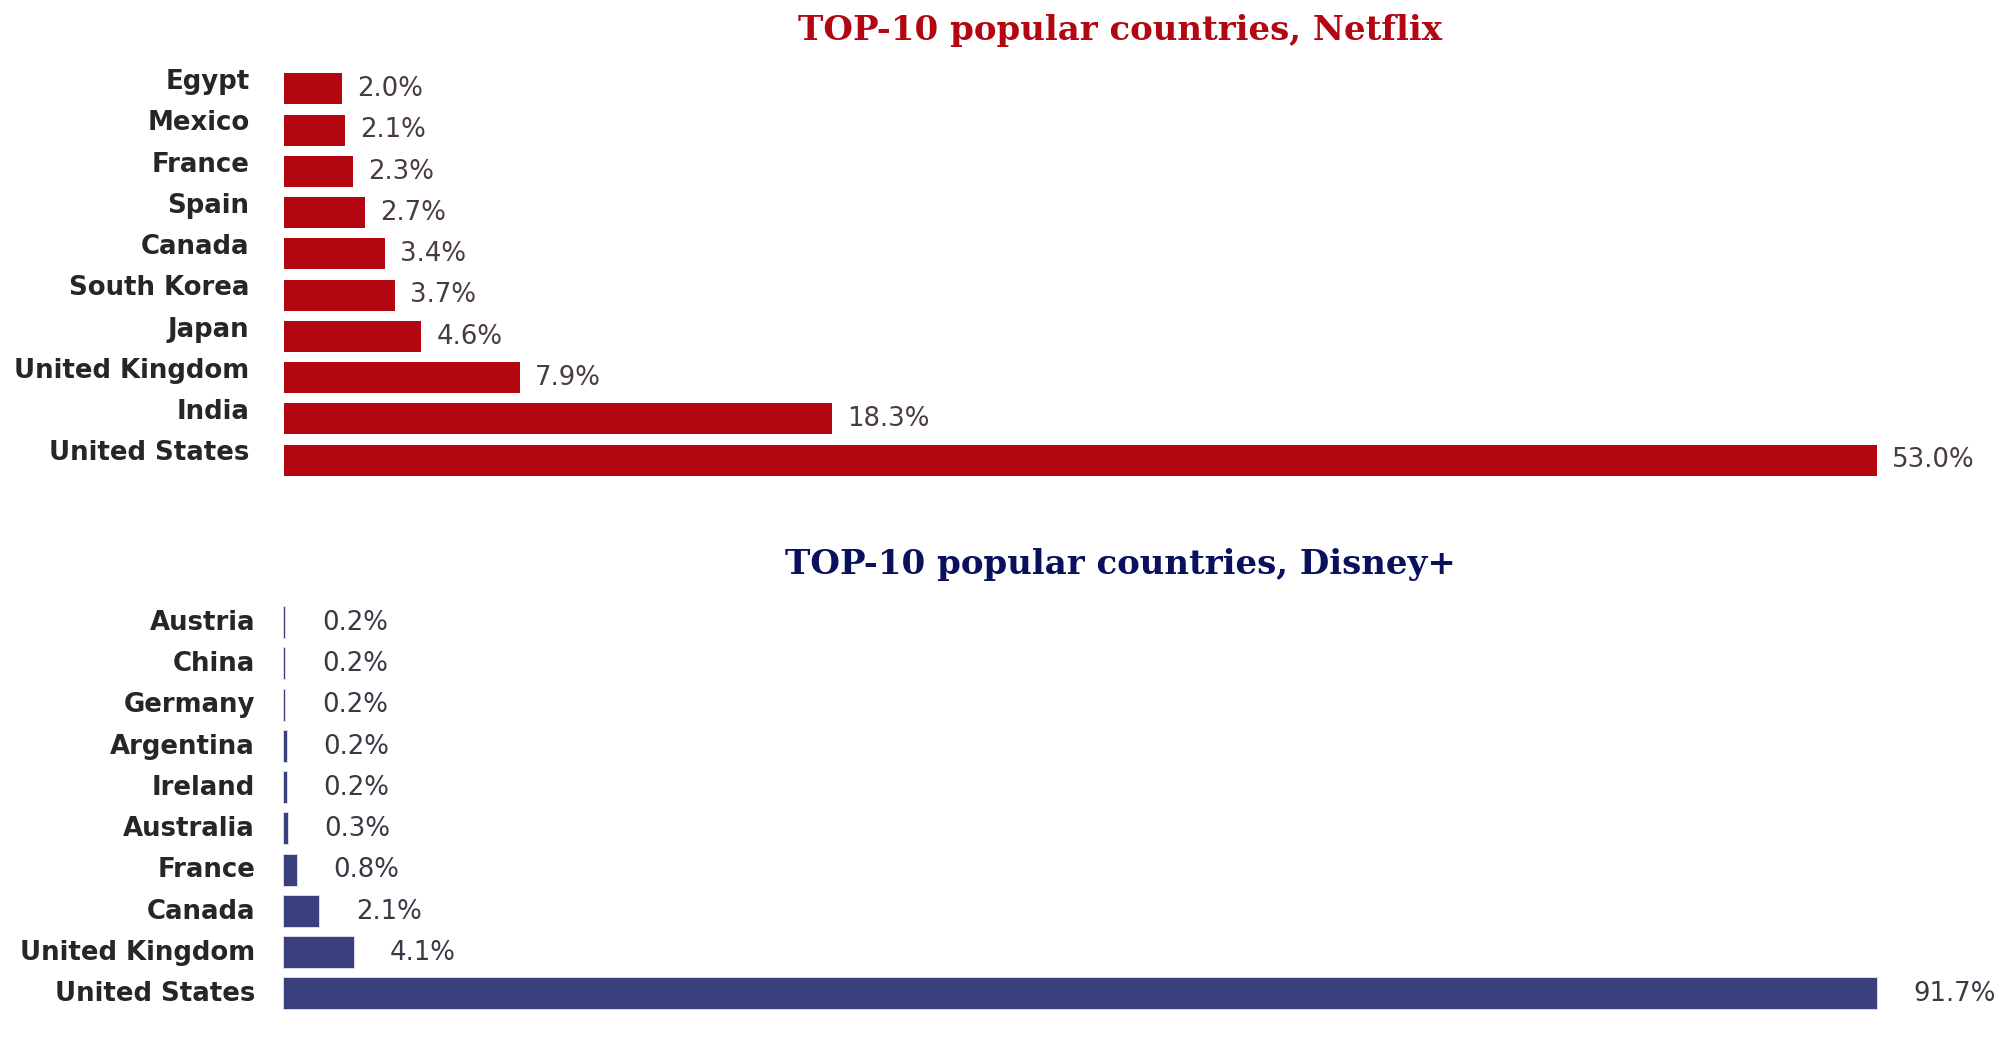

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(15, 9))

# Netflix
ax[0].barh(netflix_c.iloc[:,0], netflix_c.iloc[:,1],color='#b20710')
ax[1].barh(disney_c.iloc[:,0], disney_c.iloc[:,1], color = '#09105c', alpha=0.8)

for i in range(10):
    ax[0].text(s=f"{netflix_c.iloc[:,0][i]}",x=-60,y=i, ha="right",fontsize=13, fontweight='bold')
    ax[0].text(s=f"{round(netflix_c.iloc[:,1][i]/sum(netflix_c.iloc[:,1])*100,1)}%",x=netflix_c.iloc[:,1][i]+25,y=i, va="center",ha="left",fontsize=13,color='#4a3c3d')
    ax[1].text(s=f"{disney_c.iloc[:,0][i]}",x=-20,y=i, va="center",ha="right",fontsize=13, fontweight='bold')
    ax[1].text(s=f"{round(disney_c.iloc[:,1][i]/sum(disney_c.iloc[:,1])*100,1)}%",x=disney_c.iloc[:,1][i]+25,y=i, va="center",ha="left",fontsize=13,color='#383945')
    
ax[0].axis("off"), ax[1].axis("off")
ax[0].set_title("TOP-10 popular countries, Netflix", fontsize=17,color='#b20710', fontweight='bold', fontfamily='serif')
ax[1].set_title("TOP-10 popular countries, Disney+", fontsize=17,color='#09105c', fontweight='bold', fontfamily='serif')

plt.show()

### 6. 상위 10개 나라에 대한 고객연령 비교

In [34]:
ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}


In [35]:
disney['target_ages'] = disney['rating'].replace(ages)
disney['target_ages'].unique()

array(['Kids', 'Older Kids', nan, 'Teens'], dtype=object)

In [36]:
netflix['target_ages'] = netflix['rating'].replace(ages)
netflix['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min', nan], dtype=object)

In [37]:
disney['count'] = 1
netflix['count'] = 1

In [38]:
netflix['country1'].replace('United States', 'USA', inplace=True)
netflix['country1'].replace('United Kingdom', 'UK',inplace=True)
netflix['country1'].replace('South Korea', 'Korea',inplace=True)

disney['country1'].replace('United States', 'USA', inplace=True)
disney['country1'].replace('United Kingdom', 'UK',inplace=True)
disney['country1'].replace('South Korea', 'Korea',inplace=True)

In [46]:
netflix_age = netflix.groupby('country1')[['country1','count']].sum().sort_values(by='count',ascending=False).reset_index()
netflix_age = netflix_age['country1']

netflix_heatmap = netflix.loc[netflix['country1'].isin(netflix_age)]

netflix_heatmap = pd.crosstab(netflix_heatmap['country1'],netflix_heatmap['target_ages'],normalize = "index").T

In [73]:
disney_age = disney.groupby('country1')[['country1','count']].sum().sort_values(by='count',ascending=False).reset_index()
disney_age = disney['country1']

disney_heatmap = disney.loc[netflix['country1'].isin(disney_age)]

disney_heatmap = pd.crosstab(disney_heatmap['country1'],disney_heatmap['target_ages'],normalize = "index").T

In [49]:
netflix_heatmap

country1,,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,Brazil,Bulgaria,Cambodia,...,USA,Ukraine,United Arab Emirates,"United Kingdom,","United States,",Uruguay,Venezuela,Vietnam,West Germany,Zimbabwe
target_ages,,,,,,,,,,,,,,,,,,,,,
66 min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000312,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
74 min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000312,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
84 min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000312,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Adults,0.5,0.763158,0.456897,0.777778,0.333333,0.0,0.777778,0.678571,1.0,1.0,...,0.485670,0.5,0.285714,1.0,1.0,0.555556,0.5,0.428571,1.0,0.0
Kids,0.0,0.052632,0.146552,0.000000,0.000000,1.0,0.000000,0.071429,0.0,0.0,...,0.071963,0.0,0.047619,0.0,0.0,0.222222,0.0,0.142857,0.0,1.0
Older Kids,0.0,0.052632,0.241379,0.111111,0.333333,0.0,0.055556,0.107143,0.0,0.0,...,0.191900,0.0,0.190476,0.0,0.0,0.222222,0.0,0.000000,0.0,0.0
Teens,0.5,0.131579,0.155172,0.111111,0.333333,0.0,0.166667,0.142857,0.0,0.0,...,0.249533,0.5,0.476190,0.0,0.0,0.000000,0.5,0.428571,0.0,0.0


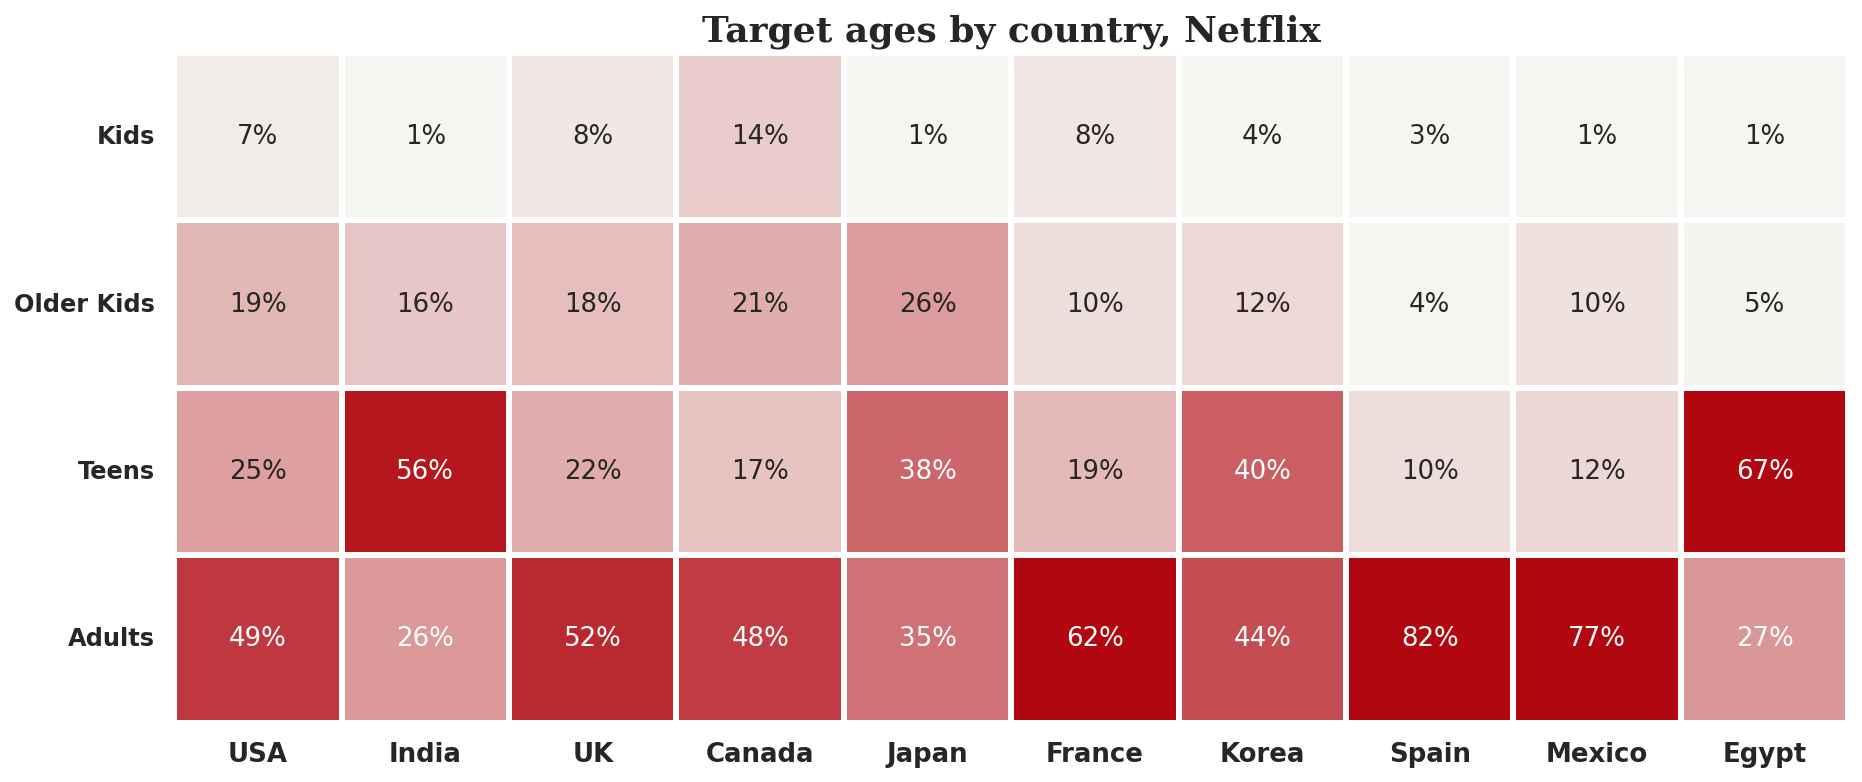

In [92]:
net_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f5f5f1','#b20710'])

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'Korea', 'Spain','Mexico', 'Egypt']

age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(netflix_heatmap.loc[age_order,country_order2],cmap=net_cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":13})

  
plt.title("Target ages by country, Netflix", fontsize=18, fontweight='bold', fontfamily='serif')

ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize=12, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0, fontsize=13, fontweight='bold')
ax.set_ylabel('')    
ax.set_xlabel('')

plt.show()

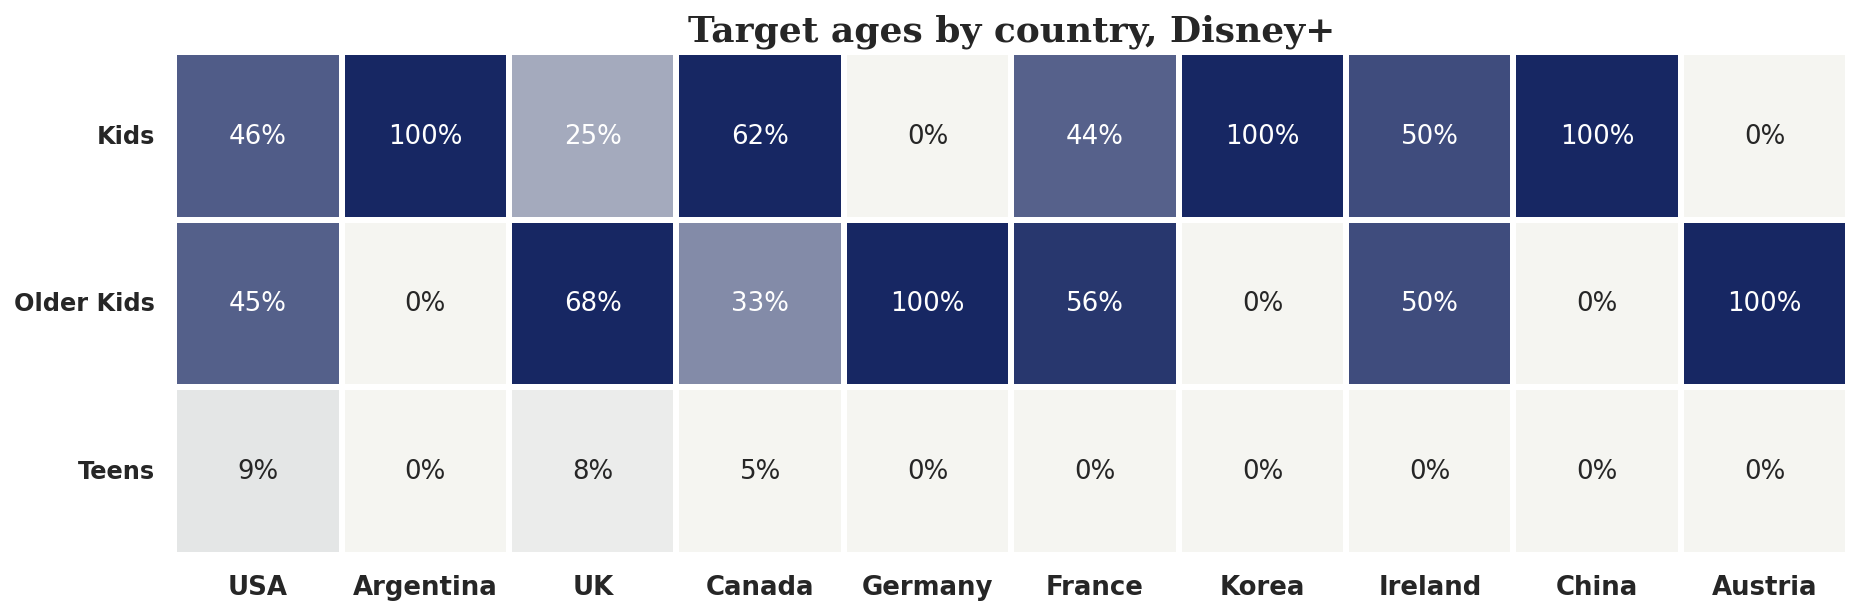

In [90]:
dis_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f5f5f1','#172763'])

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

country_order2 = ['USA', 'Argentina', 'UK', 'Canada', 'Germany', 'France', 'Korea', 'Ireland','China', 'Austria']

age_order = ['Kids','Older Kids','Teens']

sns.heatmap(disney_heatmap.loc[age_order,country_order2],cmap=dis_cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":13})

  
plt.title("Target ages by country, Disney+", fontsize=18, fontweight='bold', fontfamily='serif')

ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize=12, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 0, fontsize=13, fontweight='bold')
ax.set_ylabel('')    
ax.set_xlabel('')

plt.show()

### 7. 제목 WordCloud로 나타내기

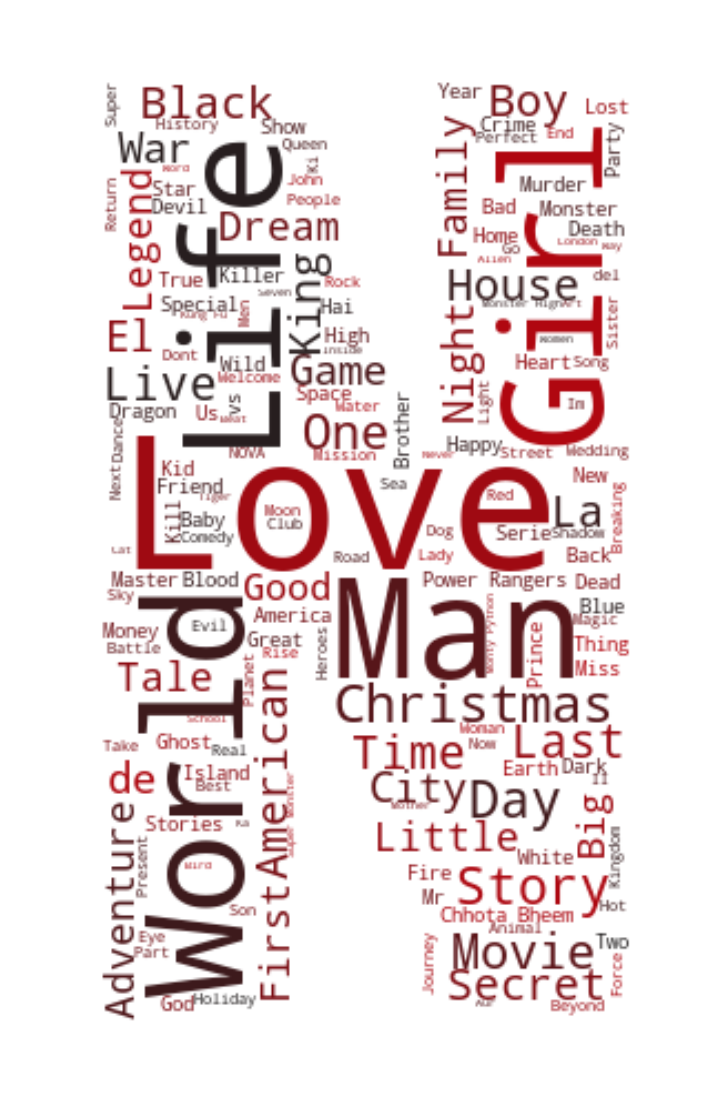

In [157]:
netlogo_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(netflix['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('/content/drive/Othercomputers/drive/drive/netflix_logo.png'))

plt.rcParams['figure.figsize'] = (13, 10)
wordcloud = WordCloud(background_color = 'white', width = 2000,  height = 800, colormap = netlogo_cmap, max_words = 170, mask = mask).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

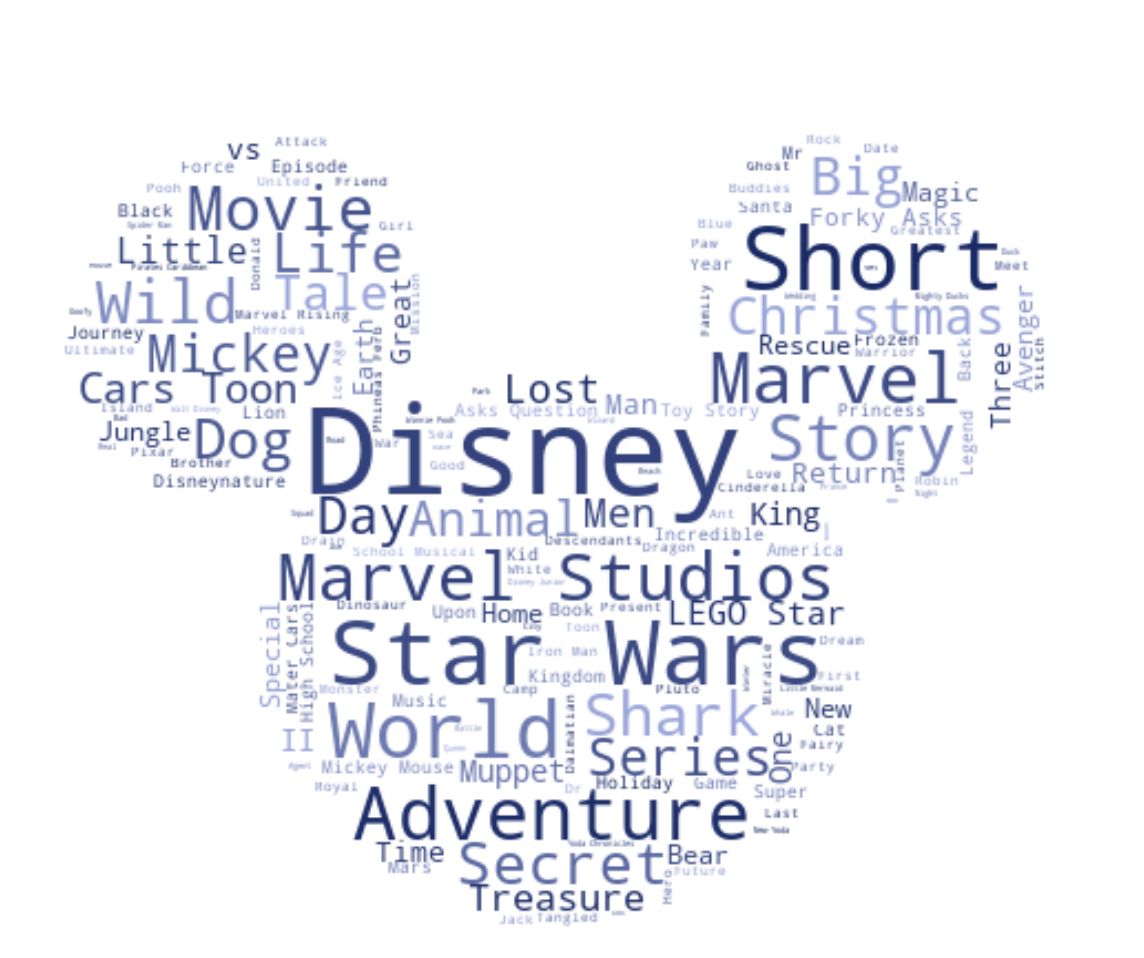

In [153]:
logo_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#9ca8db','#172763'])

text = str(list(disney['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('/content/drive/Othercomputers/drive/drive/disney_logo.png'))

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 3000,  height = 800, colormap = logo_cmap, max_words = 170, mask = mask).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()